In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('dataset/data.csv')

In [4]:
original_data=data.copy()

In [17]:
data.shape

(7043, 21)

In [19]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
data.info() # check type of each column and null values and length of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# drop customer ID column, No use of it
data.drop(columns=["customerID"],inplace=True)

In [24]:
data.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25,No
439,Male,0,No,No,1,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,55.05,55.05,No


In [ ]:
# Checking unquie values of a columns
num_columns=['tenure','MonthlyCharges','TotalCharges']
for col in data.columns:
    if col not in num_columns:
        print(f"Name : {col}   ->  Values: {data[col].unique()}",end="\n\n")

Name : gender   ->  Values: ['Female' 'Male']

Name : SeniorCitizen   ->  Values: [0 1]

Name : Partner   ->  Values: ['Yes' 'No']

Name : Dependents   ->  Values: ['No' 'Yes']

Name : PhoneService   ->  Values: ['No' 'Yes']

Name : MultipleLines   ->  Values: ['No phone service' 'No' 'Yes']

Name : InternetService   ->  Values: ['DSL' 'Fiber optic' 'No']

Name : OnlineSecurity   ->  Values: ['No' 'Yes' 'No internet service']

Name : OnlineBackup   ->  Values: ['Yes' 'No' 'No internet service']

Name : DeviceProtection   ->  Values: ['No' 'Yes' 'No internet service']

Name : TechSupport   ->  Values: ['No' 'Yes' 'No internet service']

Name : StreamingTV   ->  Values: ['No' 'Yes' 'No internet service']

Name : StreamingMovies   ->  Values: ['No' 'Yes' 'No internet service']

Name : Contract   ->  Values: ['Month-to-month' 'One year' 'Two year']

Name : PaperlessBilling   ->  Values: ['Yes' 'No']

Name : PaymentMethod   ->  Values: ['Electronic check' 'Mailed check' 'Bank transfer (auto

In [ ]:
# we can see that if tenure is 0 then the TotalCharges is empty and 11 rows are like this, we can replace them with 0.0
data[data['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
data['TotalCharges']= data['TotalCharges'].replace(" ","0.0")

In [9]:
# now we can convert into float
data['TotalCharges']=data['TotalCharges'].astype(float)
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [40]:
# checking the datatype change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# checking and string column is empty 
num_columns=['tenure','MonthlyCharges','TotalCharges']
for col in data.columns:
    if col not in num_columns:
        print(f"Name : {col}   ->  Values: {len(data[data[col]==" "])}",end="\n\n") #no empty values

Name : gender   ->  Values: 0

Name : SeniorCitizen   ->  Values: 0

Name : Partner   ->  Values: 0

Name : Dependents   ->  Values: 0

Name : PhoneService   ->  Values: 0

Name : MultipleLines   ->  Values: 0

Name : InternetService   ->  Values: 0

Name : OnlineSecurity   ->  Values: 0

Name : OnlineBackup   ->  Values: 0

Name : DeviceProtection   ->  Values: 0

Name : TechSupport   ->  Values: 0

Name : StreamingTV   ->  Values: 0

Name : StreamingMovies   ->  Values: 0

Name : Contract   ->  Values: 0

Name : PaperlessBilling   ->  Values: 0

Name : PaymentMethod   ->  Values: 0

Name : Churn   ->  Values: 0



In [44]:
# Imabalance in chrun column
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Insights
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

# EDA

In [45]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features - Analysis 
1. distribution of the numerical feature
2. box plot 
3. heat Map

In [65]:
def plot_histogram(data,column_name):
    
    plt.figure(figsize=(5,5))
    sns.histplot(data=data,x=column_name,kde=True)
    plt.title(f"{column_name}")
    
    # calculate mean and median of that column
    col_mean=data[column_name].mean()
    col_median=data[column_name].median()
    
    # Add vertical lines for mean and median
    plt.axvline(col_mean,color="red",linestyle="dashed", linewidth=1,label="Mean")
    plt.axvline(col_median,color="yellow",linestyle="dashed", linewidth=1,label="Median")
    
    plt.legend()
    plt.show()
    

In [72]:
def plot_Boxplot(data,column_name):
    
    plt.figure(figsize=(5,5))
    plt.boxplot(data[column_name])
    plt.title(f"{column_name}")
    plt.ylabel(column_name)
    plt.show()
    

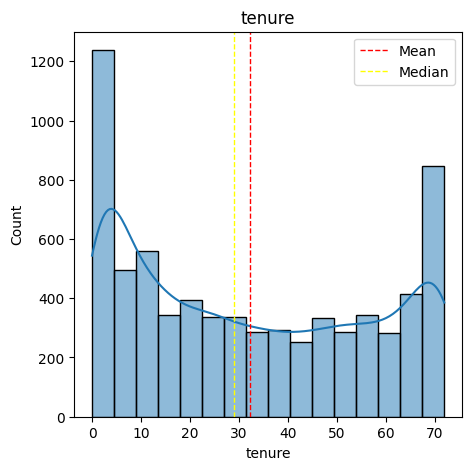

In [66]:
plot_histogram(data,'tenure')


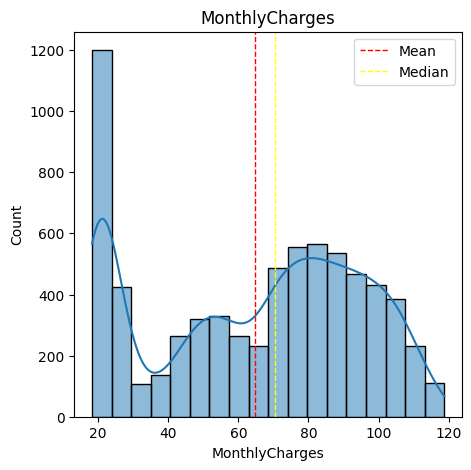

In [67]:
plot_histogram(data,'MonthlyCharges')

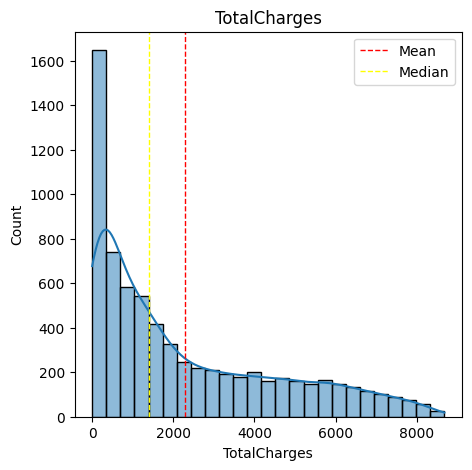

In [68]:
plot_histogram(data,'TotalCharges')


## Box Plot for numerical columns

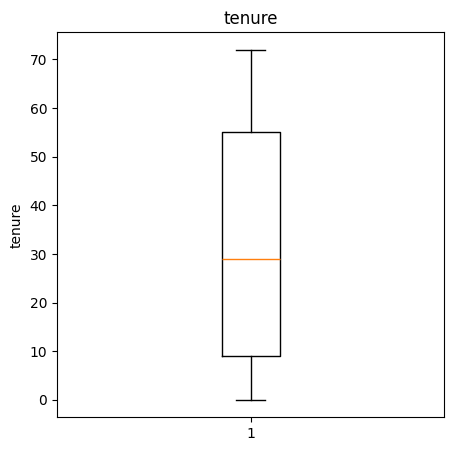

In [73]:
plot_Boxplot(data,"tenure")

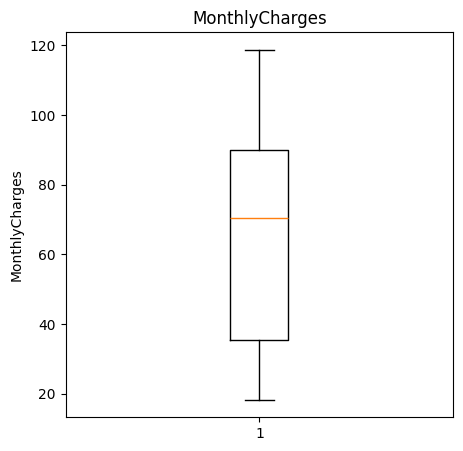

In [74]:
plot_Boxplot(data,"MonthlyCharges")

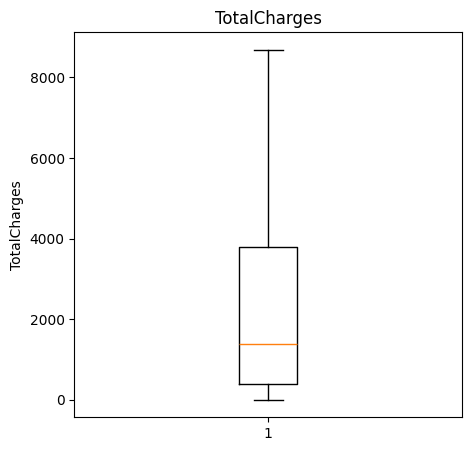

In [75]:
plot_Boxplot(data,"TotalCharges")

## Correlation Heat Map for numerical columns

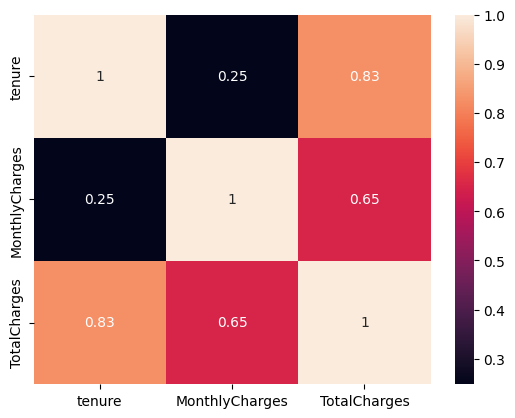

In [78]:
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)
plt.show()

### Insights
1. TotalCharges is left skewed
2. No outliers is not there
3. There is correlation b/w tenure and total charges

### Categorical feature - Analysis

In [79]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


1. Count plot for categorical columns

In [85]:
object_list = data.select_dtypes(include="object").columns.to_list()
object_list.append("SeniorCitizen")

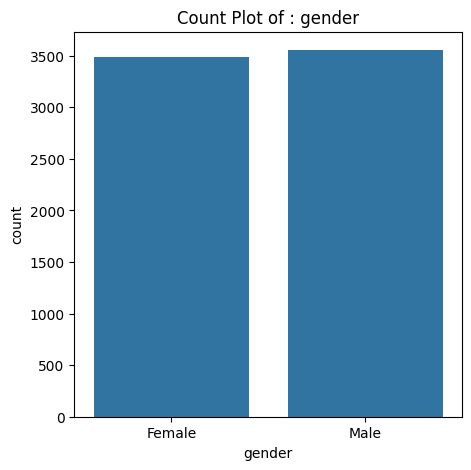

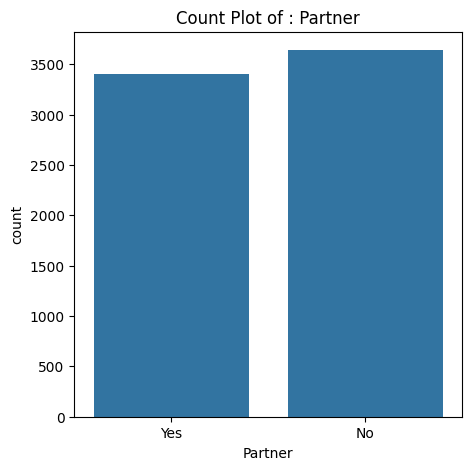

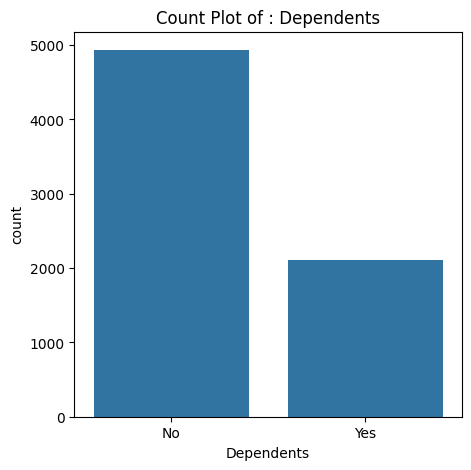

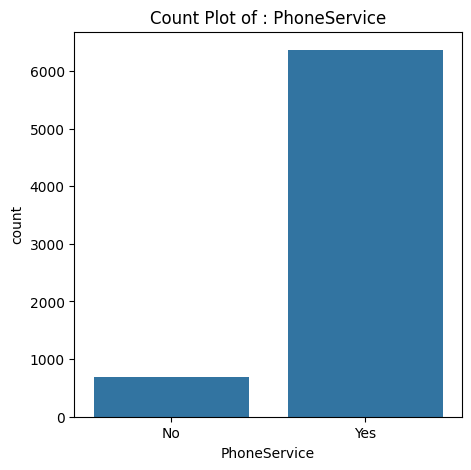

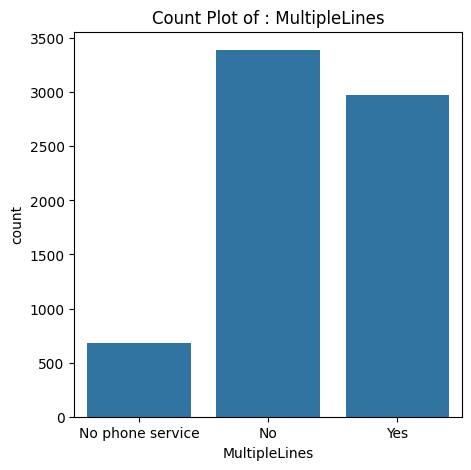

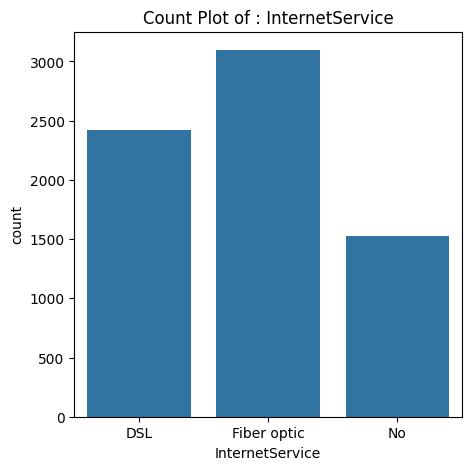

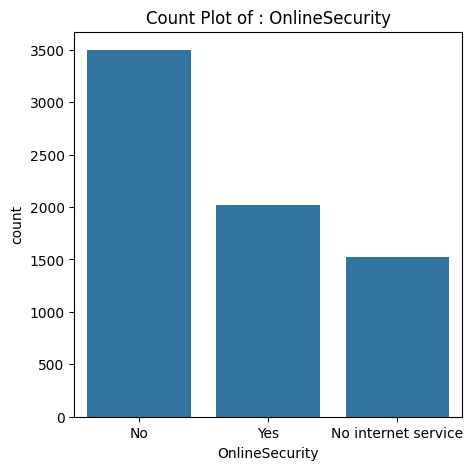

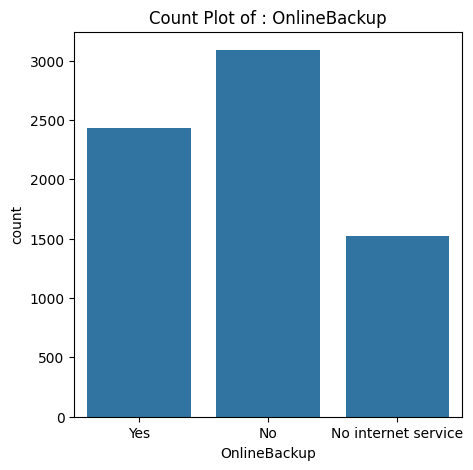

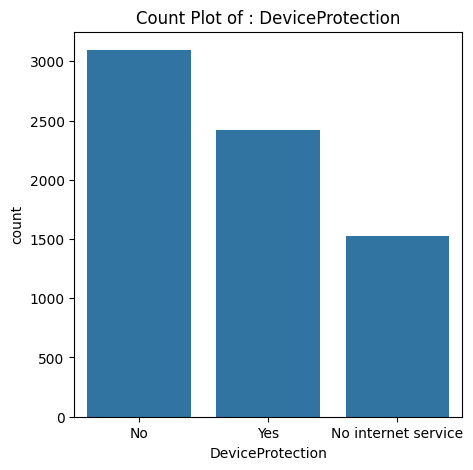

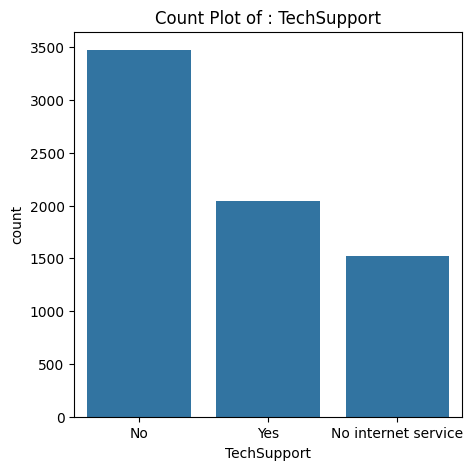

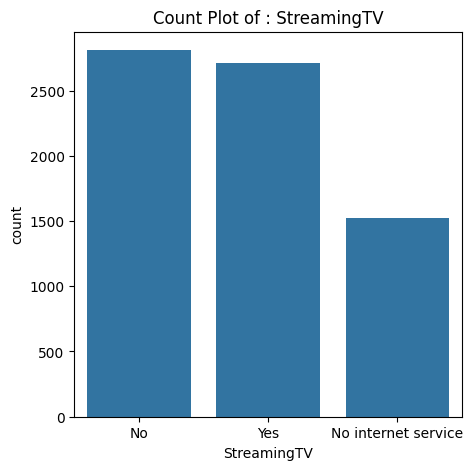

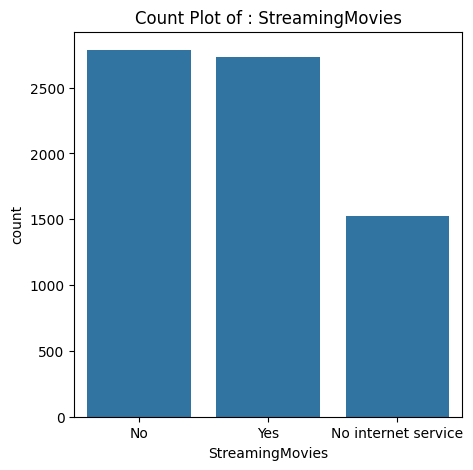

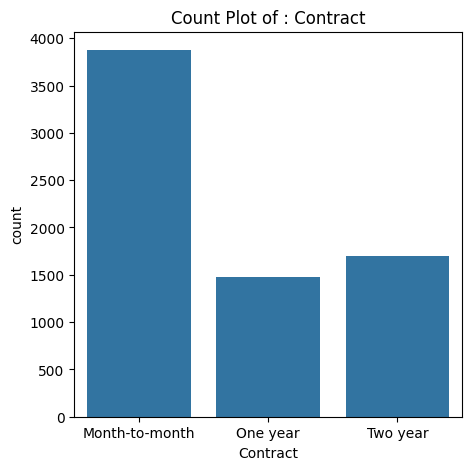

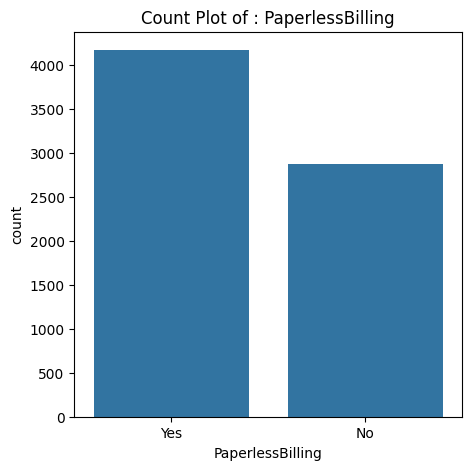

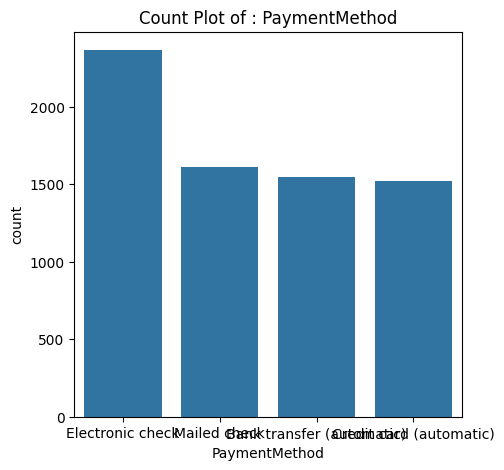

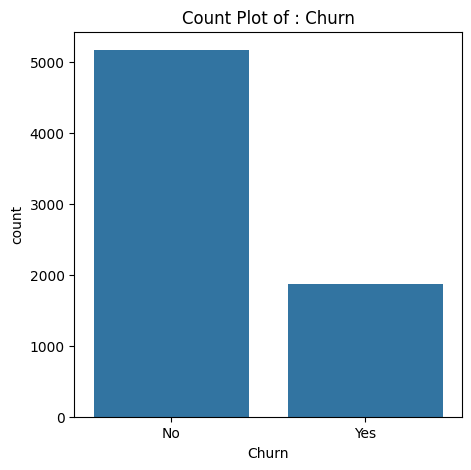

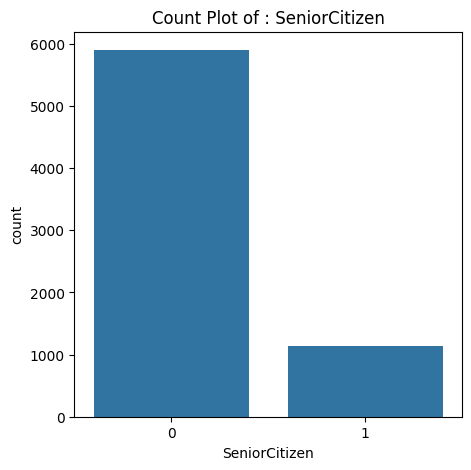

In [86]:
for col in object_list:
    plt.figure(figsize=(5,5))
    sns.countplot(x=data[col])
    plt.title(f"Count Plot of : {col}")
    plt.show()

## Preprocessing

In [10]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Label Encoded for target column [churn]

In [12]:
data["Churn"]=data["Churn"].replace({"Yes":1,"No":0})
data.head(2)

C:\Users\gowtham.l\AppData\Local\Temp\ipykernel_23836\813591307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"]=data["Churn"].replace({"Yes":1,"No":0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [13]:
data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### Label Encoder Categorical features

In [14]:
object_list = data.select_dtypes(include="object").columns.to_list()

In [17]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [19]:
# initialize the dictionary to save the encoders
encoders={}

# apply label encoding and save encoders
for col in object_list:
    labelEncoder=LabelEncoder()
    data[col]=labelEncoder.fit_transform(data[col])
    encoders[col]=labelEncoder
    
# save encoders to pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [20]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [21]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## Save the preprocessing file Here

In [22]:
Preprocessed_data=data.copy()

## Standardization for linear model

In [38]:
from sklearn.preprocessing import StandardScaler
# initialize the dictionary to save the encoders
StandardScaler_dict={}

# apply label encoding and save encoders
for col in ["tenure","MonthlyCharges","TotalCharges"]:
    sc=StandardScaler()
    data[col] = sc.fit_transform(data[[col]]).ravel()
    StandardScaler_dict[col]=sc
    
# save encoders to pickle file
with open("StandardScaler_dict.pkl","wb") as f:
    pickle.dump(StandardScaler_dict,f)

In [40]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0


In [50]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,-2.421273e-17,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,-6.406285e-17,-3.783239e-17,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1.000071e+00,1.000071e+00,0.441561
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,-1.005780e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.725399e-01,-8.299464e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.857327e-01,-3.905282e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.338335e-01,6.648034e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.794352e+00,2.825806e+00,1.000000


In [52]:
data.to_csv("Preprocessed.csv", index=False)

## Spliting data for training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [41]:
# spliting X and Y columnms
x=data.drop(columns=["Churn"])
y=data["Churn"]

In [42]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165


In [43]:
x.shape,y.shape

((7043, 19), (7043,))

In [44]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
X_train.shape,X_test.shape

((4930, 19), (2113, 19))

# AS the target is not balance [Going to use Oversampling Technique]

In [29]:
from imblearn.over_sampling import SMOTE

In [46]:
smote=SMOTE(random_state=42)
X_train_SMOTE,y_train_SMOTE=smote.fit_resample(X_train,y_train)

In [47]:
X_train_SMOTE.shape

(7270, 19)

In [48]:
y_train_SMOTE.value_counts()

Churn
0    3635
1    3635
Name: count, dtype: int64

In [49]:
X_train_SMOTE.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,0.880735,1,2,0,0,2,0,2,2,0,1,1,2,0.197365,0.657480
1,1,0,0,0,-1.277445,1,0,1,0,0,0,0,2,0,0,1,2,0.524739,-0.970243
2,1,0,0,0,-0.788800,1,0,2,1,1,1,1,1,1,1,0,1,-1.510962,-0.891227
3,0,1,1,1,-0.340876,1,0,1,0,0,2,0,2,2,2,1,2,1.056514,-0.007184
4,0,1,0,0,-1.073843,1,0,1,2,0,0,0,0,0,0,1,2,0.310367,-0.806850


In [53]:
# saving X_train_SMOTE and y_train_SMOTE and test data for future training
X_train_SMOTE.to_csv("X_train_SMOTE.csv", index=False)
y_train_SMOTE.to_csv("y_train_SMOTE.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
